In [1]:
# ! pip install ipython-sql
# ! pip install sqlalchemy
# ! pip install psycopg2
# ! pip install python-sql
# ! pip install pandas-sql
# ! pip install sql-queries

In [1]:
import pandas as pd
import psycopg2 as ps
import pandas.io.sql as sqlio
import missingno as msno

In [3]:
%reload_ext sql

In [4]:
from sqlalchemy import create_engine

In [5]:
conn2=ps.connect(dbname="Assignment",

               user="postgres",password= "Lkq0717@",host="localhost",

                port="5432")

In [6]:
sql="""SELECT * FROM pg_catalog.pg_tables"""

In [7]:
sql="""SELECT *  FROM "Fact_Table"
 """

In [8]:
import pandas as pd
df = pd.read_excel("Fact_table2.xlsx")
# Get unique values from each column
column1_values = set(df['country1'].unique())
column2_values = set(df['country2'].unique())
column3_values = set(df['country3'].unique())
column4_values = set(df['country4'].unique())

# Find the non-union of the four sets of values
non_union = column1_values ^ column2_values ^ column3_values ^ column4_values

# Convert the non-union set back to a DataFrame if desired
non_union_df = pd.DataFrame({'non_union': list(non_union)})

# Print the resulting non-union or non-union DataFrame
print(non_union)
print(non_union_df)



{nan, 'Czechia', 'Viet Nam', 'United Kingdom of Great Britain and Northern Ireland', 'South Viet Nam (former)', 'United Arab Emirates', 'Uruguay', 'Cabo Verde Republic of', 'Netherlands', 'India (until 1975)', 'Ukraine', 'Uzbekistan', 'Czech Republic', 'Germany, Federal Republic (former)', 'Togo', "CÃ´te d'Ivoire", 'Tuvalu', 'Vanuatu', 'Kiribati (until 1984)', 'Tonga', 'TÃ¼rkiye', 'Trinidad and Tobago', 'Zambia', 'Yemen', 'Tunisia', 'United Republic of Tanzania', 'Turkmenistan', 'Zimbabwe', 'Sudan (until 2011)', 'Sudan', 'United States of America', 'Netherlands (Kingdom of the)', 'Venezuela (Bolivarian Republic of)', 'Uganda'}
                                            non_union
0                                                 NaN
1                                             Czechia
2                                            Viet Nam
3   United Kingdom of Great Britain and Northern I...
4                             South Viet Nam (former)
5                                United A

In [9]:
df1=sqlio.read_sql_query(sql,conn2)
df1

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country_id,country,code,region
0,83,Afghanistan,AFG,EMR
1,103,Albania,ALB,EUR
2,1,Algeria,DZA,AFR
3,104,Andorra,AND,EUR
4,2,Angola,AGO,AFR
...,...,...,...,...
187,82,Venezuela (Bolivarian Republic of),VEN,AMR
188,192,Viet Nam,VNM,WPR
189,102,Yemen,YEM,EMR
190,46,Zambia,ZMB,AFR


In [10]:
df1.info()
df1.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country_id  192 non-null    int64 
 1   country     192 non-null    object
 2   code        192 non-null    object
 3   region      192 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.1+ KB


country_id     int64
country       object
code          object
region        object
dtype: object

In [11]:
# Drop rows with non-union countries
df1 = df1[~df1['country'].isin(non_union_df['non_union'])]

# Print the updated DataFrame
print(df1)


     country_id                          country code region
0            83                      Afghanistan  AFG    EMR
1           103                          Albania  ALB    EUR
2             1                          Algeria  DZA    AFR
3           104                          Andorra  AND    EUR
4             2                           Angola  AGO    AFR
..          ...                              ...  ...    ...
168         164                         Thailand  THA   SEAR
169         150  The Republic of North Macedonia  MKD    EUR
170         165                      Timor-Leste  TLS   SEAR
175         151                           Turkey  TUR    EUR
181         154                   United Kingdom  GBR    EUR

[169 rows x 4 columns]


<AxesSubplot:>

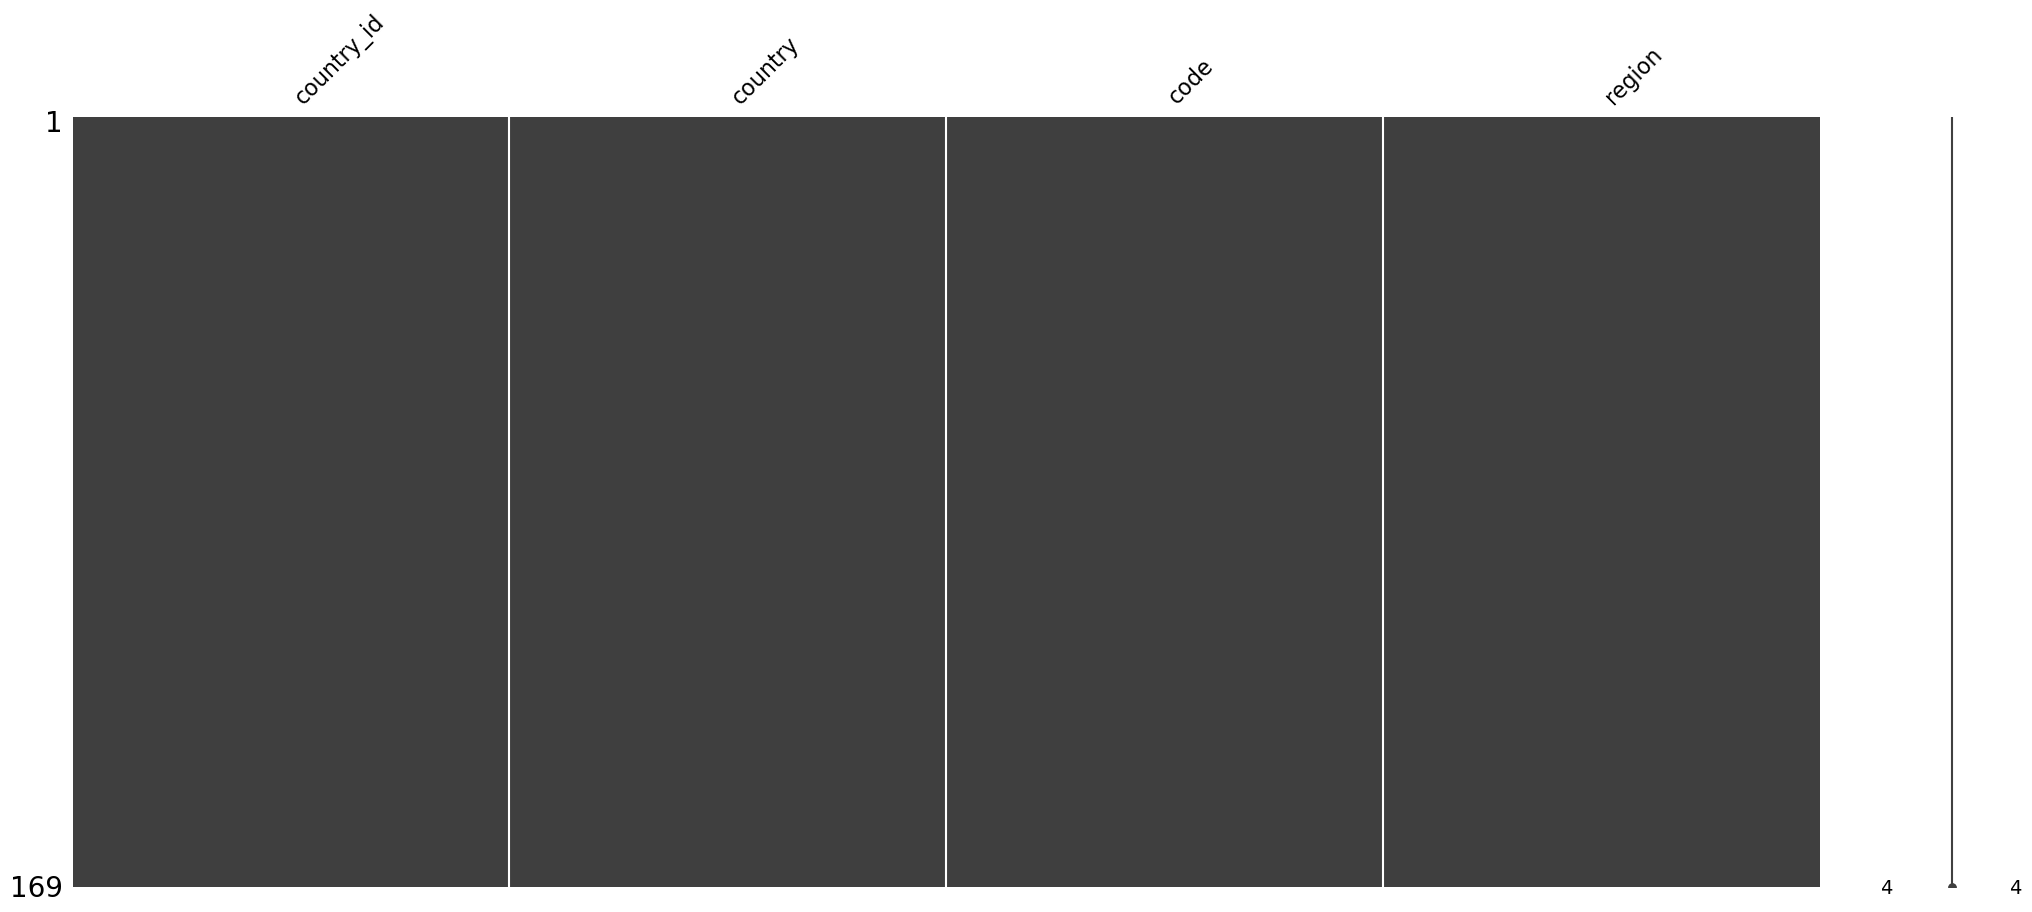

In [12]:
msno.matrix(df1)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 181
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country_id  169 non-null    int64 
 1   country     169 non-null    object
 2   code        169 non-null    object
 3   region      169 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.6+ KB


In [14]:
df1.to_csv("Clean_Fact_table.csv", index=False)

In [15]:
sql="""SELECT * FROM "GHED"
 """

In [16]:
df2=sqlio.read_sql_query(sql,conn2)
df2

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,code,region,income,year,che_gdp,gdp
0,Algeria,DZA,AFR,Lower-middle,2000.0,3.489033,4.123500e+06
1,Algeria,DZA,AFR,Lower-middle,2001.0,3.837877,4.227100e+06
2,Algeria,DZA,AFR,Lower-middle,2002.0,3.730042,4.522800e+06
3,Algeria,DZA,AFR,Lower-middle,2003.0,3.601041,5.252300e+06
4,Algeria,DZA,AFR,Lower-middle,2004.0,3.544073,6.149100e+06
...,...,...,...,...,...,...,...
4219,Viet Nam,VNM,WPR,Lower-middle,2017.0,4.712835,6.293905e+09
4220,Viet Nam,VNM,WPR,Lower-middle,2018.0,5.049667,6.977294e+09
4221,Viet Nam,VNM,WPR,Lower-middle,2019.0,5.033952,7.615568e+09
4222,Viet Nam,VNM,WPR,Lower-middle,2020.0,4.680668,7.966122e+09


In [17]:
df2.info()
df2.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4224 entries, 0 to 4223
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  4224 non-null   object 
 1   code     4224 non-null   object 
 2   region   4224 non-null   object 
 3   income   4224 non-null   object 
 4   year     4224 non-null   float64
 5   che_gdp  3981 non-null   float64
 6   gdp      4006 non-null   float64
dtypes: float64(3), object(4)
memory usage: 231.1+ KB


country     object
code        object
region      object
income      object
year       float64
che_gdp    float64
gdp        float64
dtype: object

<AxesSubplot:>

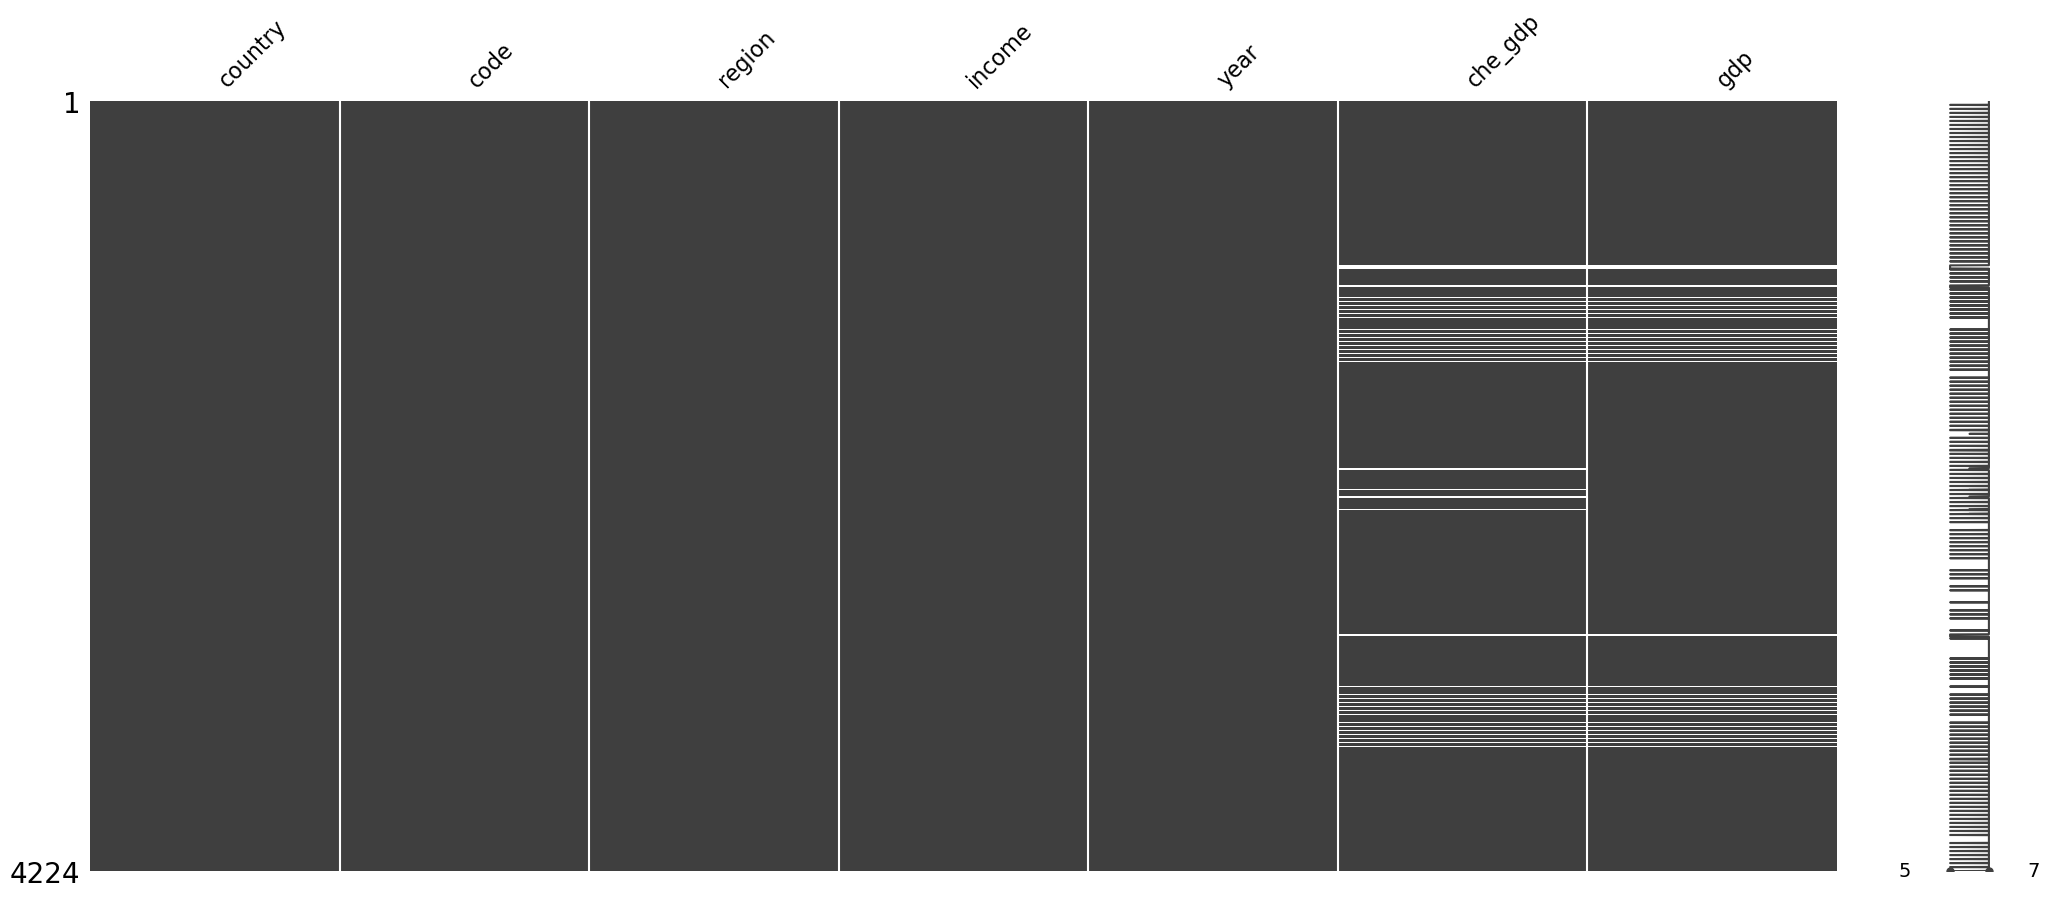

In [18]:
msno.matrix(df2)

In [19]:
# Drop rows with non-union countries
df2 = df2[~df2['country'].isin(non_union_df['non_union'])]
print(df2)

              country code region        income    year   che_gdp        gdp
0             Algeria  DZA    AFR  Lower-middle  2000.0  3.489033  4123500.0
1             Algeria  DZA    AFR  Lower-middle  2001.0  3.837877  4227100.0
2             Algeria  DZA    AFR  Lower-middle  2002.0  3.730042  4522800.0
3             Algeria  DZA    AFR  Lower-middle  2003.0  3.601041  5252300.0
4             Algeria  DZA    AFR  Lower-middle  2004.0  3.544073  6149100.0
...               ...  ...    ...           ...     ...       ...        ...
4131  Solomon Islands  SLB    WPR  Lower-middle  2017.0  4.110919    11703.0
4132  Solomon Islands  SLB    WPR  Lower-middle  2018.0  3.871730    12522.0
4133  Solomon Islands  SLB    WPR  Lower-middle  2019.0  4.462586    12833.0
4134  Solomon Islands  SLB    WPR  Lower-middle  2020.0  4.432182    12697.0
4135  Solomon Islands  SLB    WPR  Lower-middle  2021.0       NaN        NaN

[3718 rows x 7 columns]


In [20]:
df2['che_gdp'].fillna(df2['che_gdp'].mean(), inplace=True)

C:\Users\lkq07\AppData\Local\Temp\ipykernel_13212\3069268374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['che_gdp'].fillna(df2['che_gdp'].mean(), inplace=True)


In [21]:
df2['gdp'].fillna(df2['gdp'].mean(), inplace=True)

C:\Users\lkq07\AppData\Local\Temp\ipykernel_13212\1556629606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gdp'].fillna(df2['gdp'].mean(), inplace=True)


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3718 entries, 0 to 4135
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  3718 non-null   object 
 1   code     3718 non-null   object 
 2   region   3718 non-null   object 
 3   income   3718 non-null   object 
 4   year     3718 non-null   float64
 5   che_gdp  3718 non-null   float64
 6   gdp      3718 non-null   float64
dtypes: float64(3), object(4)
memory usage: 232.4+ KB


In [23]:
df2.to_csv("Clean_GHED.csv", index=False)

In [24]:
sql="""Select * FROM"Life_Expectancy_At_Birth"
 """

In [25]:
df3=sqlio.read_sql_query(sql,conn2)
df3

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,Period,Indicator,Dim1,First_Tooltip
0,Afghanistan,2019.0,Life expectancy at birth (years),Both sexes,63.21
1,Afghanistan,2019.0,Life expectancy at birth (years),Male,63.29
2,Afghanistan,2019.0,Life expectancy at birth (years),Female,63.16
3,Afghanistan,2015.0,Life expectancy at birth (years),Both sexes,61.65
4,Afghanistan,2015.0,Life expectancy at birth (years),Male,61.04
...,...,...,...,...,...
2192,Zimbabwe,2010.0,Life expectancy at birth (years),Male,49.58
2193,Zimbabwe,2010.0,Life expectancy at birth (years),Female,53.21
2194,Zimbabwe,2000.0,Life expectancy at birth (years),Both sexes,46.57
2195,Zimbabwe,2000.0,Life expectancy at birth (years),Male,45.15


In [26]:
df3.info()
df3.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        2197 non-null   object 
 1   Period         2197 non-null   float64
 2   Indicator      2197 non-null   object 
 3   Dim1           2197 non-null   object 
 4   First_Tooltip  2197 non-null   float64
dtypes: float64(2), object(3)
memory usage: 85.9+ KB


country           object
Period           float64
Indicator         object
Dim1              object
First_Tooltip    float64
dtype: object

<AxesSubplot:>

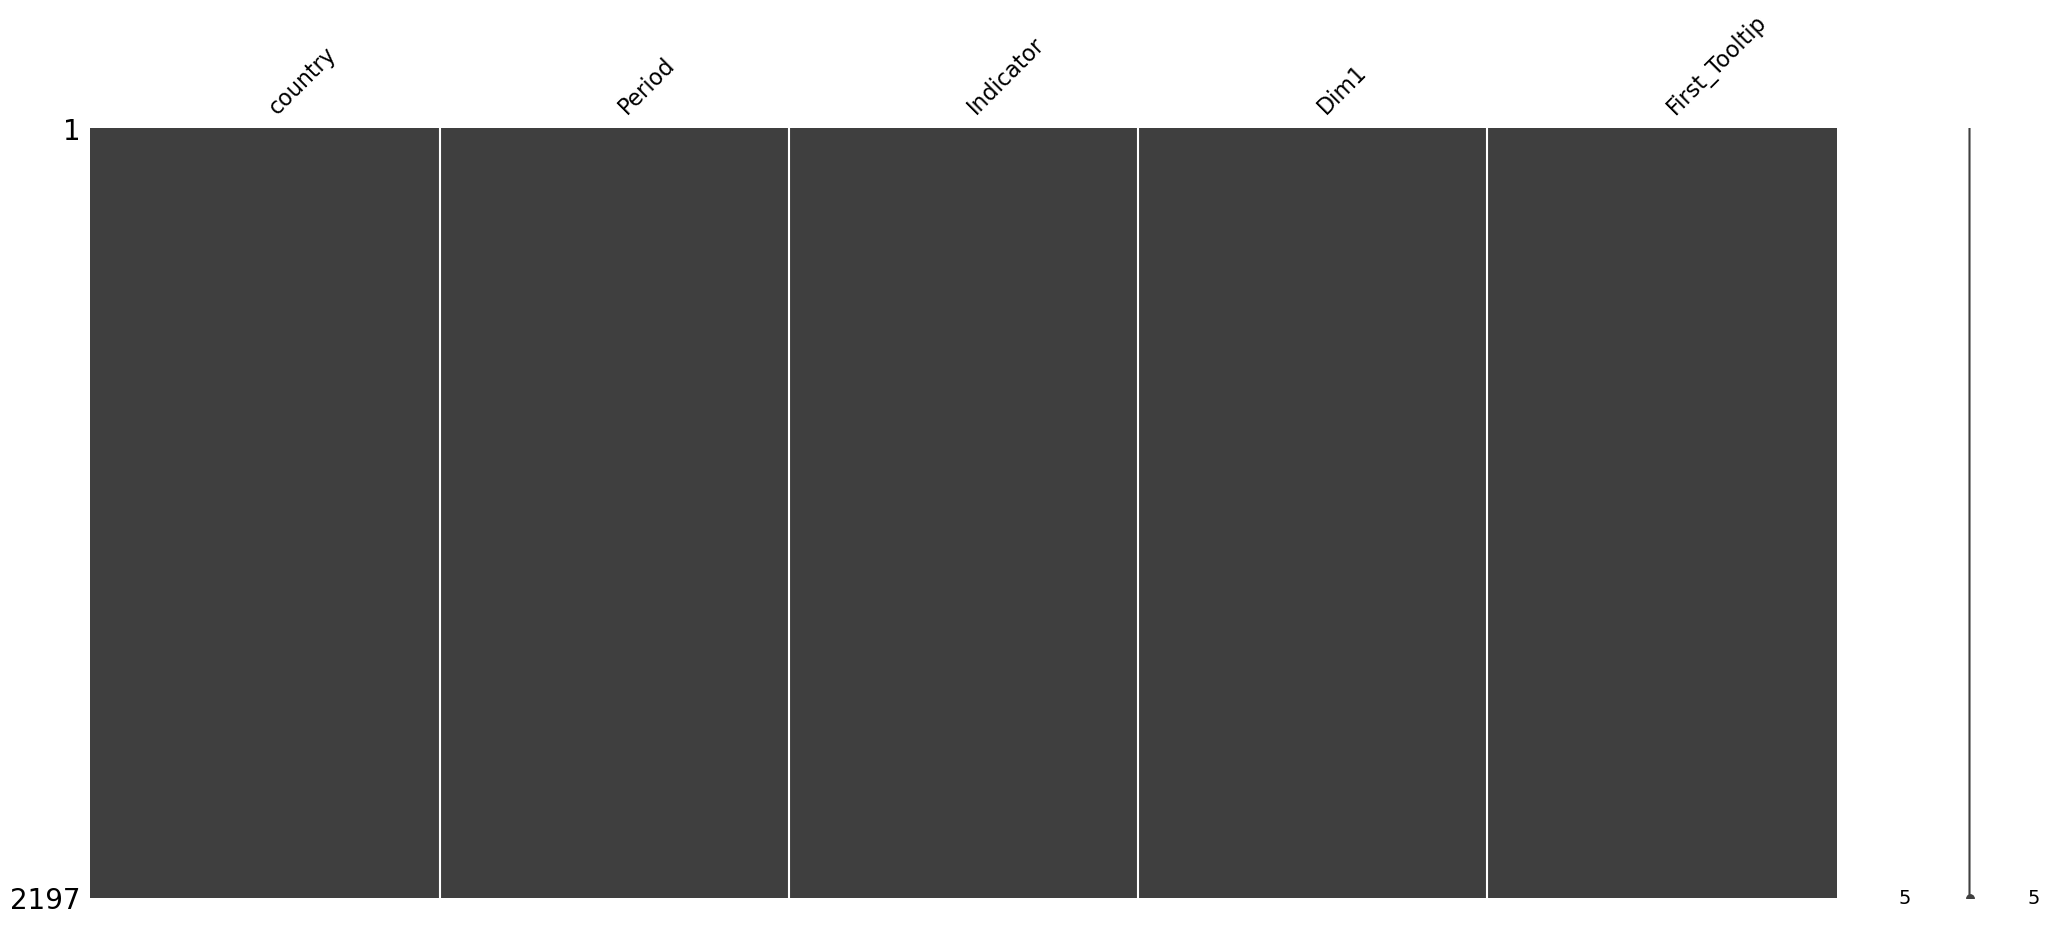

In [27]:
msno.matrix(df3)

In [28]:
# Drop rows with non-union countries
df3 = df3[~df3['country'].isin(non_union_df['non_union'])]

# Replace column name
df3 = df3.rename(columns={'First_Tooltip': 'Life expectancy at birth (years)'})
df3 = df3.rename(columns={'Period': 'year'})
# Delete the 'Indicator' column
df3 = df3.drop('Indicator', axis=1)

# Print the modified DataFrame
print(df3)



          country    year        Dim1  Life expectancy at birth (years)
0     Afghanistan  2019.0  Both sexes                             63.21
1     Afghanistan  2019.0        Male                             63.29
2     Afghanistan  2019.0      Female                             63.16
3     Afghanistan  2015.0  Both sexes                             61.65
4     Afghanistan  2015.0        Male                             61.04
...           ...     ...         ...                               ...
2012       Turkey  2010.0        Male                             74.65
2013       Turkey  2010.0      Female                             79.08
2014       Turkey  2000.0  Both sexes                             74.41
2015       Turkey  2000.0        Male                             71.94
2016       Turkey  2000.0      Female                             76.85

[1933 rows x 4 columns]


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1933 entries, 0 to 2016
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           1933 non-null   object 
 1   year                              1933 non-null   float64
 2   Dim1                              1933 non-null   object 
 3   Life expectancy at birth (years)  1933 non-null   float64
dtypes: float64(2), object(2)
memory usage: 75.5+ KB


In [30]:
df3.to_csv("Clean_Life_Expectancy_At_Birth.csv", index=False)

In [31]:
sql="""SELECT * FROM "Universal_Health_Coverage"
 """

In [32]:
df4=sqlio.read_sql_query(sql,conn2)
df4

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,Indicator,Period,First Tooltip
0,Afghanistan,UHC index of essential service coverage,2017.0,37.0
1,Afghanistan,UHC index of essential service coverage,2015.0,34.0
2,Albania,UHC index of essential service coverage,2017.0,59.0
3,Albania,UHC index of essential service coverage,2015.0,58.0
4,Algeria,UHC index of essential service coverage,2017.0,78.0
...,...,...,...,...
361,Yemen,UHC index of essential service coverage,2015.0,40.0
362,Zambia,UHC index of essential service coverage,2017.0,53.0
363,Zambia,UHC index of essential service coverage,2015.0,54.0
364,Zimbabwe,UHC index of essential service coverage,2017.0,54.0


In [33]:
df4.info()
df4.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        366 non-null    object 
 1   Indicator      366 non-null    object 
 2   Period         366 non-null    float64
 3   First Tooltip  366 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.6+ KB


country           object
Indicator         object
Period           float64
First Tooltip    float64
dtype: object

<AxesSubplot:>

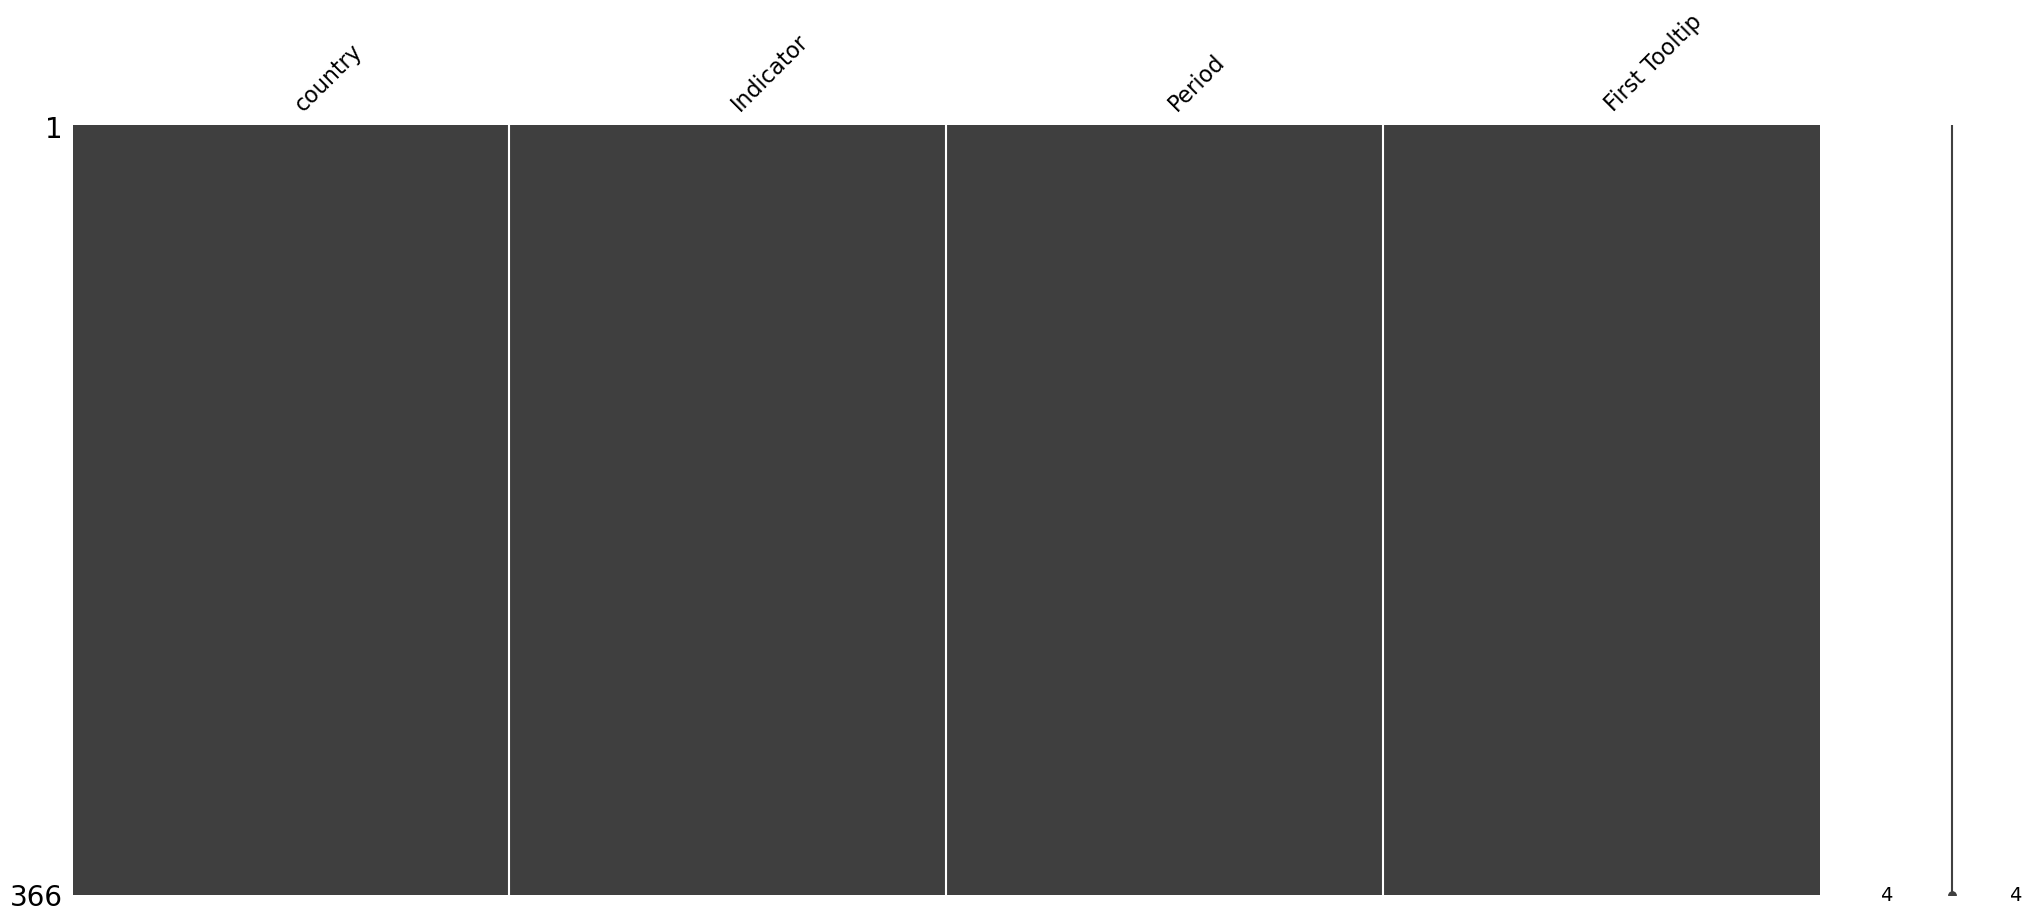

In [34]:
msno.matrix(df4)

In [35]:
# Drop rows with non-union countries
df4 = df4[~df4['country'].isin(non_union_df['non_union'])]

# Replace column name
df4 = df4.rename(columns={'First Tooltip': 'UHC index of essential service coverage'})
df4 = df4.rename(columns={'Period': 'year'})
# Delete the 'Indicator' column
df4 = df4.drop('Indicator', axis=1)

# Print the modified DataFrame
print(df4)



         country    year  UHC index of essential service coverage
0    Afghanistan  2017.0                                     37.0
1    Afghanistan  2015.0                                     34.0
2        Albania  2017.0                                     59.0
3        Albania  2015.0                                     58.0
4        Algeria  2017.0                                     78.0
..           ...     ...                                      ...
323     Thailand  2015.0                                     75.0
324  Timor-Leste  2017.0                                     52.0
325  Timor-Leste  2015.0                                     49.0
334       Turkey  2017.0                                     74.0
335       Turkey  2015.0                                     71.0

[322 rows x 3 columns]


In [36]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 335
Data columns (total 3 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country                                  322 non-null    object 
 1   year                                     322 non-null    float64
 2   UHC index of essential service coverage  322 non-null    float64
dtypes: float64(2), object(1)
memory usage: 10.1+ KB


In [37]:
df4.to_csv("Clean_UHC.csv", index=False)

In [38]:
sql="""SELECT * FROM "maternalMortalityRatio"
 """

In [39]:
df5=sqlio.read_sql_query(sql,conn2)
df5

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,Period,Indicator,First Tooltip
0,Afghanistan,2017.0,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010]
1,Afghanistan,2016.0,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040]
2,Afghanistan,2015.0,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020]
3,Afghanistan,2014.0,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080]
4,Afghanistan,2013.0,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080]
...,...,...,...,...
3289,Zimbabwe,2004.0,Maternal mortality ratio (per 100 000 live bir...,686 [597-784]
3290,Zimbabwe,2003.0,Maternal mortality ratio (per 100 000 live bir...,680 [590-779]
3291,Zimbabwe,2002.0,Maternal mortality ratio (per 100 000 live bir...,666 [577-766]
3292,Zimbabwe,2001.0,Maternal mortality ratio (per 100 000 live bir...,629 [544-723]


In [40]:
df5.info()
df5.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        3294 non-null   object 
 1   Period         3294 non-null   float64
 2   Indicator      3294 non-null   object 
 3   First Tooltip  3294 non-null   object 
dtypes: float64(1), object(3)
memory usage: 103.1+ KB


country           object
Period           float64
Indicator         object
First Tooltip     object
dtype: object

<AxesSubplot:>

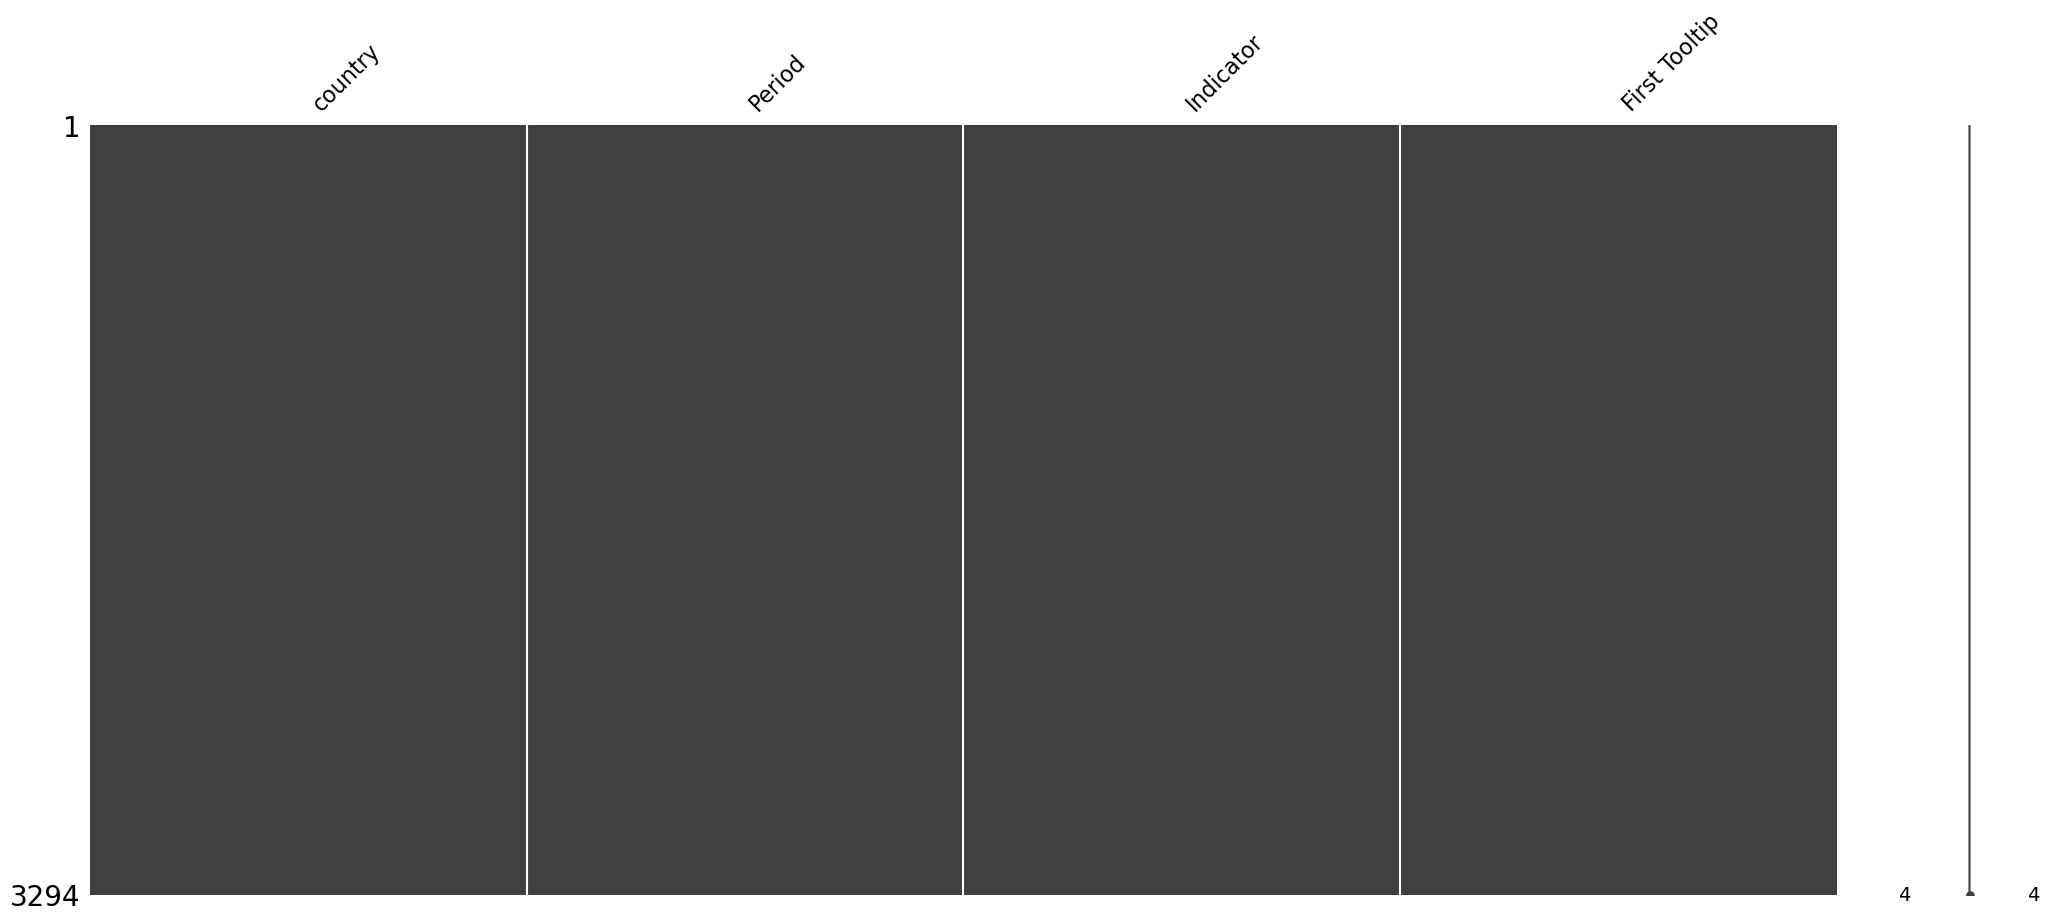

In [41]:
msno.matrix(df5)

In [42]:
# Define the pattern for splitting
pattern = r'(\d+(?:\.\d+)?)\s+\[(\d+(?:\.\d+)?)-(\d+(?:\.\d+)?)\]'

# Apply the pattern to the "First Tooltip" column
split_values = df5['First Tooltip'].str.extract(pattern)

# Assign the split values to new columns
df5['Mean(Maternal mortality ratio)'] = pd.to_numeric(split_values[0])
df5['Lower Bound(Maternal mortality ratio)'] = pd.to_numeric(split_values[1])
df5['Upper Bound(Maternal mortality ratio)'] = pd.to_numeric(split_values[2])
df5 = df5.rename(columns={'Period': 'year'})
# Drop the original "First Tooltip" column
df5 = df5.drop('First Tooltip', axis=1)
df5 = df5.drop('Indicator', axis=1)
# Print the modified DataFrame
print(df5)


          country    year  Mean(Maternal mortality ratio)  \
0     Afghanistan  2017.0                             638   
1     Afghanistan  2016.0                             673   
2     Afghanistan  2015.0                             701   
3     Afghanistan  2014.0                             786   
4     Afghanistan  2013.0                             810   
...           ...     ...                             ...   
3289     Zimbabwe  2004.0                             686   
3290     Zimbabwe  2003.0                             680   
3291     Zimbabwe  2002.0                             666   
3292     Zimbabwe  2001.0                             629   
3293     Zimbabwe  2000.0                             579   

      Lower Bound(Maternal mortality ratio)  \
0                                       427   
1                                       457   
2                                       501   
3                                       592   
4                               

In [43]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                3294 non-null   object 
 1   year                                   3294 non-null   float64
 2   Mean(Maternal mortality ratio)         3294 non-null   int64  
 3   Lower Bound(Maternal mortality ratio)  3294 non-null   int64  
 4   Upper Bound(Maternal mortality ratio)  3294 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 128.8+ KB


In [44]:
df5.to_csv("Clean_Maternal_mortality_ratio.csv", index=False)

In [45]:
sql="""SELECT * FROM "under5MortalityRate"
 """

In [46]:
df6=sqlio.read_sql_query(sql,conn2)
df6

C:\Users\lkq07\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,country,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019.0,Under-five mortality rate (probability of dyin...,Both sexes,60.27 [47.44-74.62]
1,Afghanistan,2019.0,Under-five mortality rate (probability of dyin...,Male,63.83 [50.04-79.16]
2,Afghanistan,2019.0,Under-five mortality rate (probability of dyin...,Female,56.57 [44.54-70.18]
3,Afghanistan,2018.0,Under-five mortality rate (probability of dyin...,Both sexes,62.54 [50.64-75.41]
4,Afghanistan,2018.0,Under-five mortality rate (probability of dyin...,Male,66.08 [53.41-79.76]
...,...,...,...,...,...
29994,Timor-Leste,2002.0,Under-five mortality rate (probability of dyin...,Both sexes,96.97 [87.36-107.7]
29995,Timor-Leste,2002.0,Under-five mortality rate (probability of dyin...,Male,102.6 [92.14-114]
29996,Timor-Leste,2002.0,Under-five mortality rate (probability of dyin...,Female,91.04 [81.92-101.5]
29997,Timor-Leste,2001.0,Under-five mortality rate (probability of dyin...,Both sexes,102.5 [92.72-113.3]


In [47]:
df6.info()
df6.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        29999 non-null  object 
 1   Period         29999 non-null  float64
 2   Indicator      29999 non-null  object 
 3   Dim1           29999 non-null  object 
 4   First Tooltip  29999 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


country           object
Period           float64
Indicator         object
Dim1              object
First Tooltip     object
dtype: object

<AxesSubplot:>

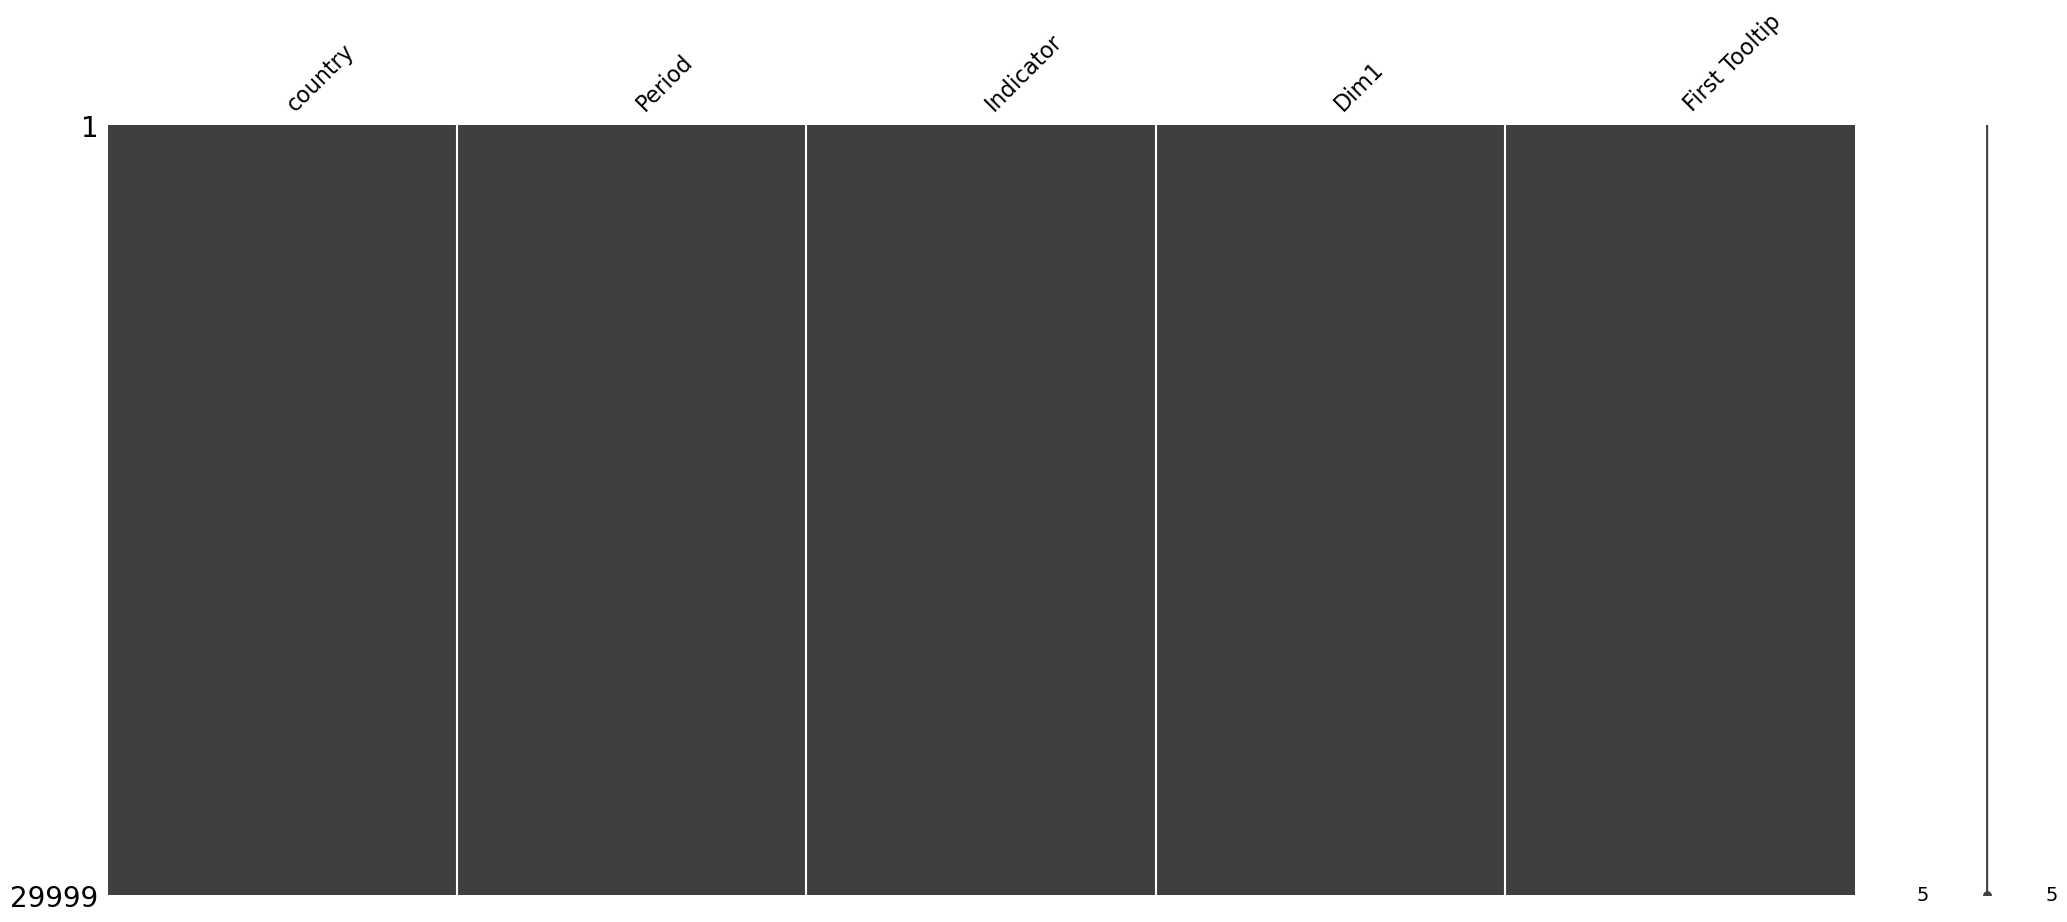

In [48]:
msno.matrix(df6)

In [49]:
# Define the pattern for splitting
pattern = r'(\d+(?:\.\d+)?)\s+\[(\d+(?:\.\d+)?)-(\d+(?:\.\d+)?)\]'

# Apply the pattern to the "First Tooltip" column
split_values = df6['First Tooltip'].str.extract(pattern)

# Assign the split values to new columns
df6['Mean(Under_5_Mortality_Rate)'] = pd.to_numeric(split_values[0])
df6['Lower Bound(Under_5_Mortality_Rate)'] = pd.to_numeric(split_values[1])
df6['Upper Bound(Under_5_Mortality_Rate)'] = pd.to_numeric(split_values[2])
df6 = df6.rename(columns={'Period': 'year'})
# Drop the original "First Tooltip" column
df6 = df6.drop('First Tooltip', axis=1)
df6 = df6.drop('Indicator', axis=1)
# Print the modified DataFrame
print(df6)

           country    year        Dim1  Mean(Under_5_Mortality_Rate)  \
0      Afghanistan  2019.0  Both sexes                         60.27   
1      Afghanistan  2019.0        Male                         63.83   
2      Afghanistan  2019.0      Female                         56.57   
3      Afghanistan  2018.0  Both sexes                         62.54   
4      Afghanistan  2018.0        Male                         66.08   
...            ...     ...         ...                           ...   
29994  Timor-Leste  2002.0  Both sexes                         96.97   
29995  Timor-Leste  2002.0        Male                        102.60   
29996  Timor-Leste  2002.0      Female                         91.04   
29997  Timor-Leste  2001.0  Both sexes                        102.50   
29998  Timor-Leste  2001.0        Male                        108.20   

       Lower Bound(Under_5_Mortality_Rate)  \
0                                    47.44   
1                                    50.04 

In [50]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              29999 non-null  object 
 1   year                                 29999 non-null  float64
 2   Dim1                                 29999 non-null  object 
 3   Mean(Under_5_Mortality_Rate)         29999 non-null  float64
 4   Lower Bound(Under_5_Mortality_Rate)  29999 non-null  float64
 5   Upper Bound(Under_5_Mortality_Rate)  29999 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB


In [51]:
df6.to_csv("Clean_Under_5_Mortality_Rate.csv",index=False)